# ***Best-Performing Student Recognition System***

# ***Problem Statement:***

Develop a Best-Performing Student Recognition
System for a college to identify and appreciate the top 3 students from each
admitted batch. The system should consider various factors, including but not
limited to academic performance, consistency over semesters, excellence in
core engineering courses, participation in local and national-level hackathons,
paper presentations, and contributions such as assisting course teachers. The
platform must feature a user-friendly interface and a well-structured database
to manage student records, achievements, and rankings. Additionally, it
should implement machine learning techniques to weigh these factors
dynamically and rank students based on their overall contributions and
performance. The system will aim to provide fair and data-driven results to
recognize the best-performing students each year. The challenge lies in
ensuring transparency, accuracy, and scalability as the number of students
and criteria grows over time.

In [1]:
!pip install pandas scikit-learn

In [3]:
# Sample data for 100 students
data = {
    "Name": [
        "Alice", "Bob", "Charlie", "David", "Ethan", "Fiona", "George", "Hannah", "Ian", "Julia",
        "Kevin", "Luna", "Mason", "Nina", "Oliver", "Penelope", "Quincy", "Rachel", "Sam", "Tina",
        "Uma", "Victor", "Wendy", "Xander", "Yasmin", "Zoe", "Aaron", "Bella", "Caleb", "Diana",
        "Edward", "Faith", "Gabriel", "Hailey", "Isaac", "Jenna", "Kyle", "Leah", "Michael", "Nora",
        "Owen", "Paula", "Quinn", "Ryan", "Sophia", "Thomas", "Ursula", "Vince", "Will", "Xenia",
        "Yuri", "Zara", "Adam", "Blake", "Chris", "Daisy", "Eva", "Felix", "Grace", "Henry", "Ivy",
        "Jack", "Kate", "Liam", "Mila", "Noah", "Olivia", "Paul", "Quinn", "Riley", "Sara", "Toby",
        "Ulysses", "Violet", "Wade", "Ximena", "Yvonne", "Zack", "Avery", "Ben", "Connor", "Delia",
        "Emily", "Frank", "Gina", "Hunter", "Isla", "Jake", "Kim", "Lucas", "Maya", "Nathan", "Oscar",
        "Penny", "Quentin", "Ruth", "Sean", "Talia", "Umar", "Valerie", "Willow", "Xavier", "Yuri"
    ],
    "Year": [2021] * 34 + [2022] * 33 + [2023] * 33,  # 100 students across 3 years
    "CGPA": [
        9.1, 8.5, 9.0, 8.8, 9.3, 9.4, 9.2, 9.5, 9.0, 8.6,
        8.9, 8.4, 9.6, 8.7, 8.8, 9.0, 9.1, 8.9, 9.3, 9.5,
        9.2, 8.8, 9.0, 8.6, 9.3, 9.1, 8.7, 9.5, 9.4, 9.0,
        8.6, 8.9, 9.2, 9.0, 9.1, 9.2, 9.0, 8.7, 9.4, 8.5,
        9.1, 9.3, 9.6, 8.8, 9.4, 9.5, 9.0, 8.9, 9.3, 9.2,
        9.1, 9.0, 8.5, 8.7, 9.6, 9.4, 9.3, 9.2, 9.5, 8.9,
        9.0, 8.7, 8.9, 9.4, 9.2, 9.1, 8.6, 9.5, 9.4, 9.0,
        8.9, 8.7, 9.1, 9.3, 9.6, 8.9, 9.5, 8.8, 9.3, 9.1,
        8.7, 9.0, 9.2, 9.1, 9.0, 8.9, 9.5, 9.4, 8.6, 9.3,
        9.1, 9.0, 8.7, 8.9, 9.2, 9.4, 9.1, 8.8, 9.5, 9.2
    ],
    "Attendance": [
        90, 85, 88, 95, 92, 91, 89, 94, 87, 90,
        92, 85, 95, 93, 90, 89, 88, 94, 91, 90,
        93, 92, 85, 91, 94, 90, 89, 92, 91, 88,
        85, 95, 90, 92, 93, 91, 89, 88, 95, 90,
        88, 90, 85, 93, 94, 91, 89, 90, 92, 87,
        90, 88, 89, 92, 94, 91, 93, 88, 89, 90,
        87, 94, 91, 93, 88, 92, 85, 91, 94, 90,
        89, 88, 93, 92, 91, 88, 94, 85, 89, 90,
        91, 92, 89, 90, 93, 91, 88, 94, 89, 90,
        88, 91, 92, 94, 90, 89, 93, 85, 92, 91
    ],
    "Projects": [
        2, 1, 3, 4, 2, 3, 5, 4, 2, 3,
        4, 3, 5, 2, 1, 4, 3, 5, 2, 4,
        5, 3, 4, 5, 3, 2, 1, 4, 5, 2,
        3, 5, 4, 2, 1, 4, 3, 5, 2, 4,
        5, 2, 3, 4, 5, 3, 2, 1, 4, 5,
        4, 2, 1, 5, 3, 4, 2, 5, 3, 4,
        2, 3, 5, 2, 1, 4, 5, 2, 4, 3,
        2, 1, 4, 5, 3, 2, 4, 3, 5, 1,
        4, 2, 3, 5, 4, 3, 1, 2, 5, 4,
        2, 5, 1, 4, 2, 3, 5, 4, 3, 1
    ],
    "Extracurricular": [
        1, 2, 0, 1, 3, 2, 4, 5, 3, 1,
        0, 2, 1, 3, 4, 5, 2, 1, 3, 4,
        5, 1, 2, 3, 4, 5, 1, 3, 2, 1,
        2, 4, 1, 3, 5, 2, 4, 5, 1, 3,
        4, 5, 1, 3, 2, 4, 5, 1, 2, 3,
        1, 3, 5, 4, 2, 3, 1, 2, 5, 4,
        2, 1, 5, 4, 3, 2, 1, 4, 3, 2,
        5, 3, 1, 4, 2, 5, 1, 3, 4, 2,
        4, 2, 1, 3, 4, 5, 1, 2, 4, 5,
        3, 1, 2, 5, 4, 3, 2, 1, 4, 5
    ]
}

In [5]:
import pandas as pd

# Get minimum length of all lists in the data dictionary
min_len = min(len(value) for value in data.values())

# Truncate all lists to the minimum length
truncated_data = {key: value[:min_len] for key, value in data.items()}

# Create DataFrame
df = pd.DataFrame(truncated_data)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             100 non-null    object 
 1   Year             100 non-null    int64  
 2   CGPA             100 non-null    float64
 3   Attendance       100 non-null    int64  
 4   Projects         100 non-null    int64  
 5   Extracurricular  100 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.8+ KB
None


In [6]:
# Display first 5 rows
print(df.head())

      Name  Year  CGPA  Attendance  Projects  Extracurricular
0    Alice  2021   9.1          90         2                1
1      Bob  2021   8.5          85         1                2
2  Charlie  2021   9.0          88         3                0
3    David  2021   8.8          95         4                1
4    Ethan  2021   9.3          92         2                3


In [7]:
# Features and target variable
X = df[["CGPA", "Attendance", "Projects", "Extracurricular"]]
y = df["CGPA"]  # Assuming CGPA is the performance measure

In [19]:
X

,CGPA,Attendance,Projects,Extracurricular
0,9.1,90,2,1
1,8.5,85,1,2
2,9.0,88,3,0
3,8.8,95,4,1
4,9.3,92,2,3
...,...,...,...,...
95,9.4,89,3,3
96,9.1,93,5,2
97,8.8,85,4,1
98,9.5,92,3,4


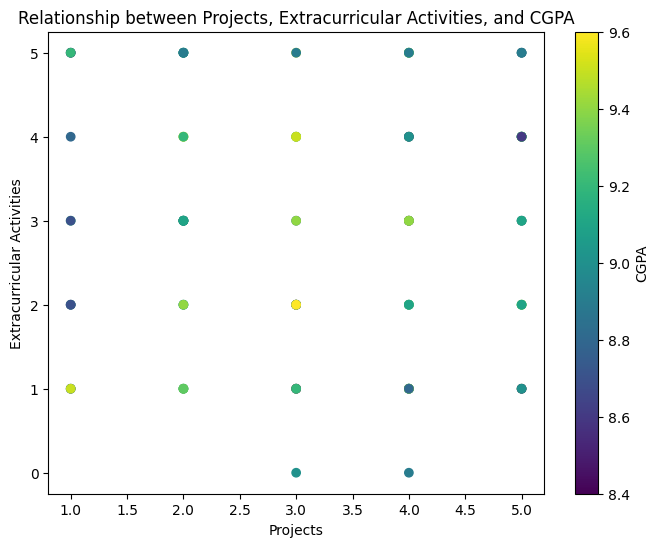

In [25]:
# @title Relationship between Projects, Extracurricular Activities, and CGPA

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Projects'], df['Extracurricular'], c=df['CGPA'], cmap='viridis')
plt.colorbar(label='CGPA')
plt.title('Relationship between Projects, Extracurricular Activities, and CGPA')
plt.xlabel('Projects')
_ = plt.ylabel('Extracurricular Activities')

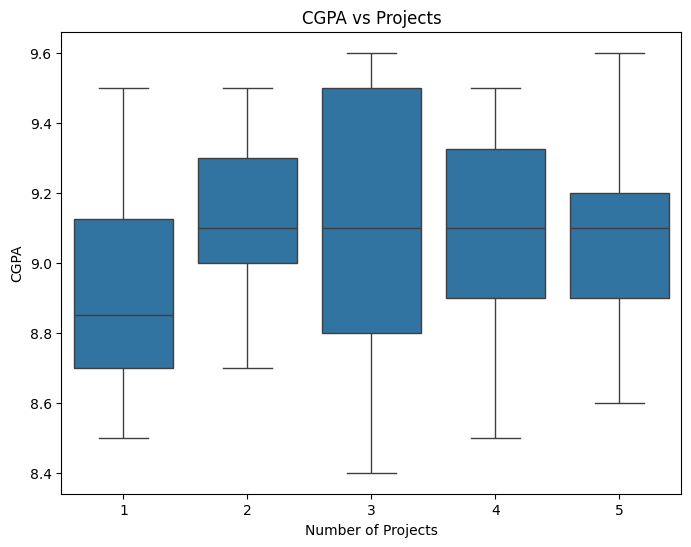

In [24]:
# @title CGPA vs Projects

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Projects', y='CGPA', data=df)
plt.xlabel('Number of Projects')
plt.ylabel('CGPA')
_ = plt.title('CGPA vs Projects')

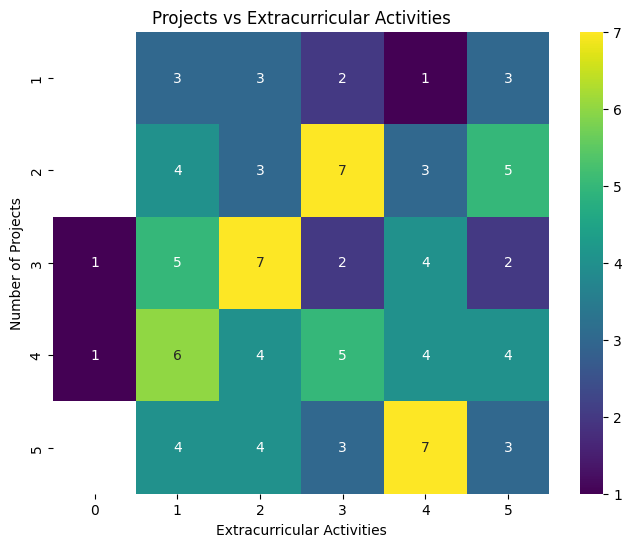

In [23]:
# @title Projects vs Extracurricular Activities

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.groupby(['Projects', 'Extracurricular'])['CGPA'].count().unstack(), annot=True, cmap='viridis', fmt='g')
plt.title('Projects vs Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
_ = plt.ylabel('Number of Projects')

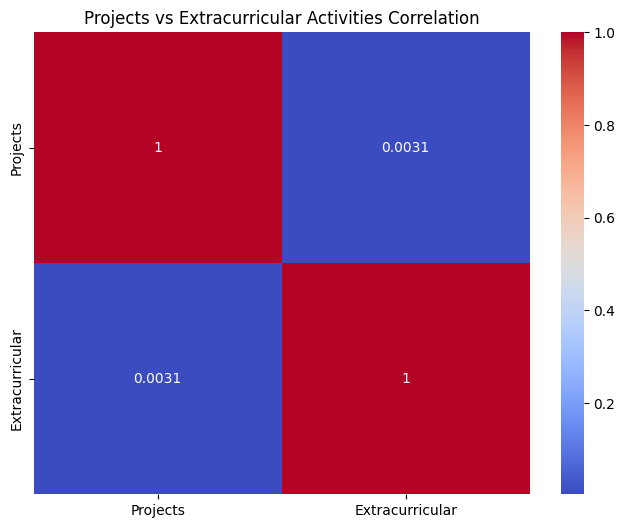

In [22]:
# @title Projects vs Extracurricular Activities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8, 6))
corr_matrix = df[['Projects', 'Extracurricular']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
_ = plt.title('Projects vs Extracurricular Activities Correlation')

<Figure size 640x480 with 0 Axes>

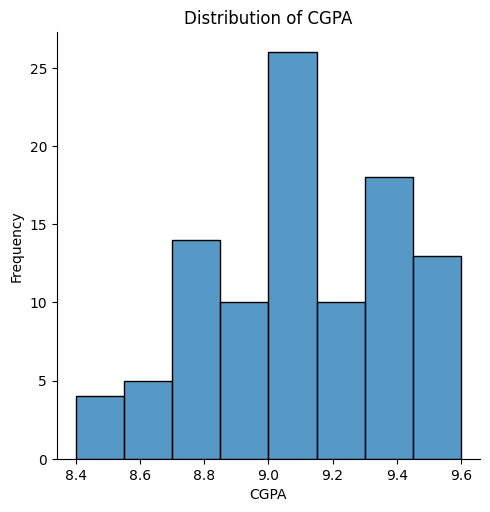

<Figure size 640x480 with 0 Axes>

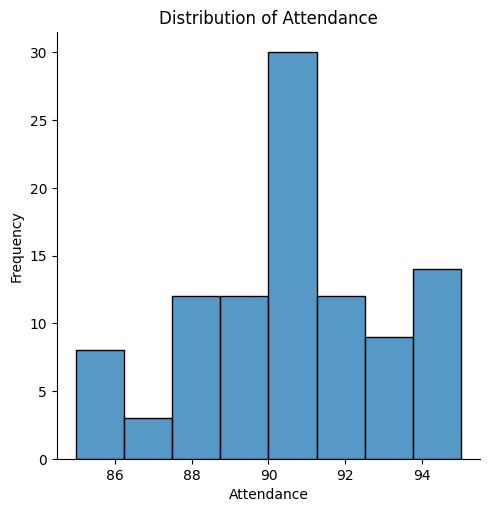

<Figure size 640x480 with 0 Axes>

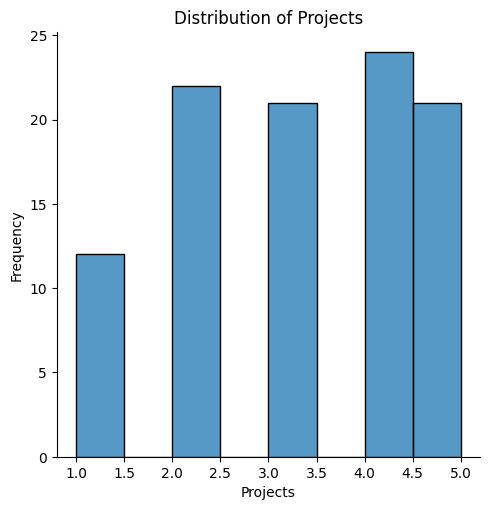

<Figure size 640x480 with 0 Axes>

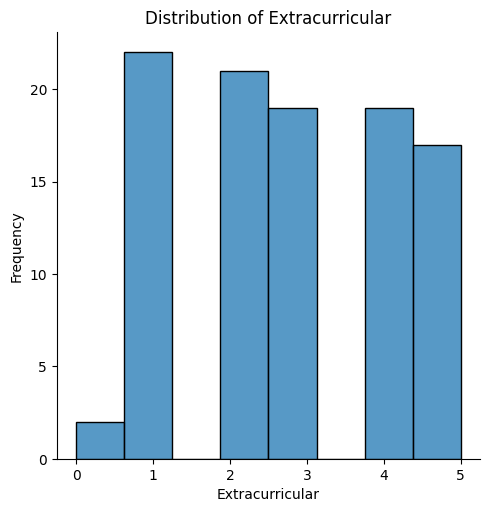

In [18]:
# prompt: Using dataframe X: distplot for all columns

import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the dataframe
for column in X.columns:
  # Create a distplot for the current column
  plt.figure()
  sns.displot(X[column])
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [10]:
y

,CGPA
0,9.1
1,8.5
2,9.0
3,8.8
4,9.3
...,...
95,9.4
96,9.1
97,8.8
98,9.5


In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Make predictions
y_pred = model.predict(X_test)


In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.00


In [15]:
# Predict CGPA for all students
df["Predicted_CGPA"] = model.predict(X)

# Get the top 3 students by predicted CGPA for each year
top_students = df.loc[df.groupby("Year")["Predicted_CGPA"].idxmax()]
top_students = top_students.nlargest(3, "Predicted_CGPA")

# Display top students
print("\nTop Performing Students:")
print(top_students[["Name", "Year", "Predicted_CGPA"]])



Top Performing Students:
     Name  Year  Predicted_CGPA
12  Mason  2021             9.6
42  Quinn  2022             9.6
74   Wade  2023             9.6
